In [11]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib.dates as dates
from mpl_toolkits.axes_grid1 import ImageGrid,make_axes_locatable,host_subplot
#from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta
import sys
import os
import pyPIPS.utils as utils
import pyPIPS.thermolib as thermo
import pyPIPS.DSDlib as dsd
#import pyPIPS.disdrometer_module as dis
import pyPIPS.plotmodule as PIPSplot
#import pyPIPS.simulator as sim
import pyPIPS.pips_io as pipsio
import pyPIPS.PIPS as pips
import pyPIPS.parsivel_params as pp
import pyPIPS.parsivel_qc as pqc
import pyPIPS.radarmodule as radar
#from pyCRMtools.modules import plotmodule as plotmod
from pyCRMtools.modules import utils as CRMutils
import pandas as pd
import xarray as xr
import glob
import numpy.random as random
from scipy.stats import gamma, uniform
from scipy.special import gamma as gammafunc
from scipy import ndimage
from metpy.plots import StationPlot
from metpy.calc import wind_components
from metpy.cbook import get_test_data
from metpy.plots import StationPlot
from metpy.plots.wx_symbols import current_weather, sky_cover
from metpy.units import units
from scipy.signal import medfilt2d
import pyart
import cartopy.crs as ccrs
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
radar_name = 'KHTX'
input_tag = 'filt_retr'
radar_type= 'NEXRAD'
date = '0430'
radar_start_timestamp = '20170430200000'
radar_end_timestamp = '20170430230000'

# Create datetime objects for start and end times
datetime_start = datetime.strptime(radar_start_timestamp, '%Y%m%d%H%M%S')
datetime_end = datetime.strptime(radar_end_timestamp, '%Y%m%d%H%M%S')

el_req = 0.5
radar_dir = '/Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial'
radar_paths = glob.glob(radar_dir + '/*20170430_2*{}*_{}.nc'.format(radar_name, input_tag))

In [6]:

radar_path_dict = radar.get_radar_paths(radar_paths, radar_start_timestamp, radar_end_timestamp,
                                        el_req=el_req, radar_type=radar_type)
print(radar_path_dict['sweeptimelist'])

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/Projects/pyPIPS/pyPIPS/radarmodule.py:330: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  sweeptime = sweepfile_netcdf.variables['time_coverage_start'].get_value().tostring()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/Projects/pyPIPS/pyPIPS/radarmodule.py:330: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  sweeptime = sweepfile_netcdf.variables['time_coverage_start'].get_value().tostring()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/Projects/pyPIPS/pyPIPS/radarmodule.py:330: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  sweeptime = sweepfile_netcdf.variables['time_coverage_start'].get_value().tostring()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num

[datetime.datetime(2017, 4, 30, 20, 3, 27), datetime.datetime(2017, 4, 30, 20, 10, 13), datetime.datetime(2017, 4, 30, 20, 16, 59), datetime.datetime(2017, 4, 30, 20, 23, 45), datetime.datetime(2017, 4, 30, 20, 30, 32), datetime.datetime(2017, 4, 30, 20, 37, 10), datetime.datetime(2017, 4, 30, 20, 43, 47), datetime.datetime(2017, 4, 30, 20, 50, 10), datetime.datetime(2017, 4, 30, 20, 56, 28), datetime.datetime(2017, 4, 30, 21, 2, 57), datetime.datetime(2017, 4, 30, 21, 9, 33), datetime.datetime(2017, 4, 30, 21, 16, 2), datetime.datetime(2017, 4, 30, 21, 22, 23), datetime.datetime(2017, 4, 30, 21, 28, 43), datetime.datetime(2017, 4, 30, 21, 35, 2), datetime.datetime(2017, 4, 30, 21, 41, 21), datetime.datetime(2017, 4, 30, 21, 47, 42), datetime.datetime(2017, 4, 30, 21, 54, 22), datetime.datetime(2017, 4, 30, 22, 1, 8), datetime.datetime(2017, 4, 30, 22, 7, 54), datetime.datetime(2017, 4, 30, 22, 14, 18), datetime.datetime(2017, 4, 30, 22, 23, 13), datetime.datetime(2017, 4, 30, 22, 29, 

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/Projects/pyPIPS/pyPIPS/radarmodule.py:330: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  sweeptime = sweepfile_netcdf.variables['time_coverage_start'].get_value().tostring()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/Projects/pyPIPS/pyPIPS/radarmodule.py:330: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  sweeptime = sweepfile_netcdf.variables['time_coverage_start'].get_value().tostring()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num

In [14]:
# Read in PIPS data
PIPS_data_dir = '/Volumes/scr_fast/Projects/VORTEXSE/obsdata/full_PIPS_dataset_RB15/'
PIPS_filename = 'parsivel_combined_FMCW_2017_{}17_PIPS2A_60s.nc'.format(date)
PIPS_filepath = os.path.join(PIPS_data_dir, PIPS_filename)
PIPS_ds = xr.load_dataset(PIPS_filepath)
print(PIPS_ds)

<xarray.Dataset>
Dimensions:                              (diameter_bin: 32, fallspeed_bin: 32, fields_KHTX: 49, parameter: 3, time: 1441)
Coordinates:
  * time                                 (time) datetime64[ns] 2017-04-30T00:...
    fallspeed                            (fallspeed_bin) float64 0.05 ... 20.8
    diameter                             (diameter_bin) float64 0.0625 ... 24.5
    min_diameter                         (diameter_bin) float64 0.0 ... 23.0
    max_diameter                         (diameter_bin) float64 0.125 ... 26.0
    min_fallspeeds                       (fallspeed_bin) float64 0.0 ... 19.2
    max_fallspeeds                       (fallspeed_bin) float64 0.1 ... 22.4
  * parameter                            (parameter) object 'N0' 'lamda' 'alpha'
  * fields_KHTX                          (fields_KHTX) object 'N0_TMM_F' ... ...
  * fallspeed_bin                        (fallspeed_bin) float64 0.05 ... 20.8
  * diameter_bin                         (diameter_bin)

In [21]:
PIPS_loc = eval(PIPS_ds.location)
PIPS_lat = PIPS_loc[0]
PIPS_lon = PIPS_loc[1]
print(PIPS_loc)
print(PIPS_lat, PIPS_lon)

(34.68711876893391, -86.00486430487216, 200.95575867737972)
34.68711876893391 -86.00486430487216


In [10]:
radar_dict = radar.read_sweeps_new(radar_path_dict, el_req=el_req, radar_type=radar_type)
print(radar_dict['radarsweeplist'])
print(radar_dict['radarsweeplist'][0].info())

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() ins

Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_195950.515_to_20170430_200518.389_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.43945312
Time of sweep =  2017-04-30 20:03:27 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_200637.124_to_20170430_201204.187_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:331: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  v.meta_group == meta_group_name]
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:331: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  v.meta_group == meta_group_name]
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:331: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  v.meta_group == meta_group_name]
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:331: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  v.meta_group == meta_group_name]
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:331: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  v.meta_group == meta_group_name]
/Users/dawson29

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 20:10:13 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_201323.479_to_20170430_201850.264_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 20:16:59 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_202008.943_to_20170430_202535.883_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 20:23:45 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_202655.513_to_20170430_203222.650_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.43945312
Time of sweep =  2017-04-30 20:30:32 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_203339.936_to_20170430_203858.991_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.4119873
Time of sweep =  2017-04-30 20:37:10 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_204016.335_to_20170430_204535.639_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 20:43:47 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_204649.628_to_20170430_205155.429_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:331: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  v.meta_group == meta_group_name]
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:331: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  v.meta_group == meta_group_name]
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:331: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  v.meta_group == meta_group_name]
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:331: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  v.meta_group == meta_group_name]
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:331: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  v.meta_group == meta_group_name]
/Users/dawson29

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 20:50:10 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_205308.698_to_20170430_205814.714_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 20:56:28 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_205926.701_to_20170430_210445.746_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.43945312
Time of sweep =  2017-04-30 21:02:57 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_210603.077_to_20170430_211122.357_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 21:09:33 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_211237.780_to_20170430_211749.507_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.43945312
Time of sweep =  2017-04-30 21:16:02 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_211903.496_to_20170430_212409.064_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 21:22:23 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_212522.750_to_20170430_213028.625_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 21:28:43 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_213142.380_to_20170430_213648.125_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 21:35:02 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_213801.893_to_20170430_214307.260_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 21:41:21 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_214421.410_to_20170430_214927.369_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.43945312
Time of sweep =  2017-04-30 21:47:42 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_215046.486_to_20170430_215613.132_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 21:54:22 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_215732.041_to_20170430_220259.165_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.43945312
Time of sweep =  2017-04-30 22:01:08 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_220418.105_to_20170430_220944.917_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 22:07:54 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_221057.896_to_20170430_221603.284_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 22:14:18 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_221936.677_to_20170430_222503.430_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.43945312
Time of sweep =  2017-04-30 22:23:13 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_222622.674_to_20170430_223150.720_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 22:29:59 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_223310.302_to_20170430_223837.418_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.48339844
Time of sweep =  2017-04-30 22:36:46 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_223956.724_to_20170430_224524.246_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.43945312
Time of sweep =  2017-04-30 22:43:33 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_224637.884_to_20170430_225143.700_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.43945312
Time of sweep =  2017-04-30 22:49:58 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
Opening file:  /Volumes/scr_fast/Projects/VORTEXSE/obsdata/2017/NEXRAD/PIPS2A_FMCW/0430/HTX/CFRadial/cfrad.20170430_225302.689_to_20170430_225830.074_KHTX_Surveillance_SUR_filt_retr.nc


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  d = dict((k, getattr(ncvar, k)) for k in ncvar.ncattrs()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.8/site-packages/pyart/io/cfradial.py:337: DeprecationWarning: tos

Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.45043945
Time of sweep =  2017-04-30 22:56:39 
Number of gates:  1832
Radar lat,lon,alt [34.93055725] [-86.08361053] [566.]
Gatewidth  250.0
Radar beam width (degrees): 0.92
Number of azimuths in sweep  720
[<pyart.core.radar.Radar object at 0x7fbb3046b730>, <pyart.core.radar.Radar object at 0x7fbb30468550>, <pyart.core.radar.Radar object at 0x7fbb107aaeb0>, <pyart.core.radar.Radar object at 0x7fbaf08be430>, <pyart.core.radar.Radar object at 0x7fbb31834c10>, <pyart.core.radar.Radar object at 0x7fbb31834fd0>, <pyart.core.radar.Radar object at 0x7fbb31834190>, <pyart.core.radar.Radar object at 0x7fbb00a321f0>, <pyart.core.radar.Radar object at 0x7fbb00a32160>, <pyart.core.radar.Radar object at 0x7fbad01d7670>, <pyart.core.radar.Radar object at 0x7fbab21caaf0>, <pyart.core.radar.Radar object at 0x7fbab21cad60>, <pyart.core.radar.Radar object at 0x7fbab21cae50>, <pyart.core.radar.Radar object at 0x7fbb304686a0>, <p

		long_name: calibrated_radar_receiver_gain_h_co_polar_channel
		units: db
		meta_group: radar_calibration
	r_calib_receiver_gain_vc:
		data: <ndarray of type: float32 and shape: (1,)>
		_FillValue: -9999.0
		long_name: calibrated_radar_receiver_gain_v_co_polar_channel
		units: db
		meta_group: radar_calibration
	r_calib_receiver_gain_hx:
		data: <ndarray of type: float32 and shape: (1,)>
		_FillValue: -9999.0
		long_name: calibrated_radar_receiver_gain_h_cross_polar_channel
		units: db
		meta_group: radar_calibration
	r_calib_receiver_gain_vx:
		data: <ndarray of type: float32 and shape: (1,)>
		_FillValue: -9999.0
		long_name: calibrated_radar_receiver_gain_v_cross_polar_channel
		units: db
		meta_group: radar_calibration
	r_calib_base_dbz_1km_hc:
		data: <ndarray of type: float32 and shape: (1,)>
		_FillValue: -9999.0
		long_name: radar_reflectivity_at_1km_at_zero_snr_h_co_polar_channel
		units: dBZ
		meta_group: radar_calibration
	r_calib_base_dbz_1km_vc:
		data: <ndarray of type: 

Time:  2017-04-30 20:03:27
Elevation:  0.48339844


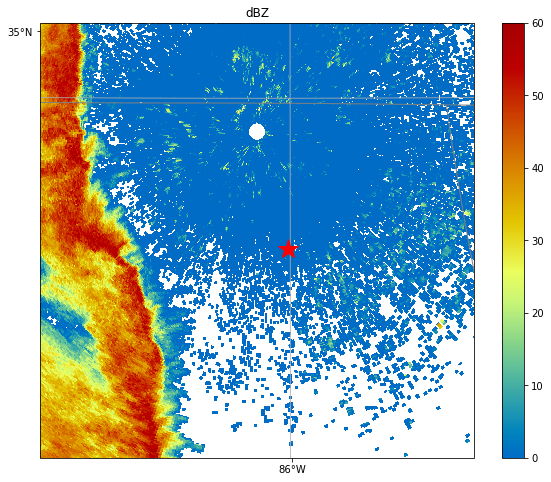

Time:  2017-04-30 20:10:13
Elevation:  0.48339844


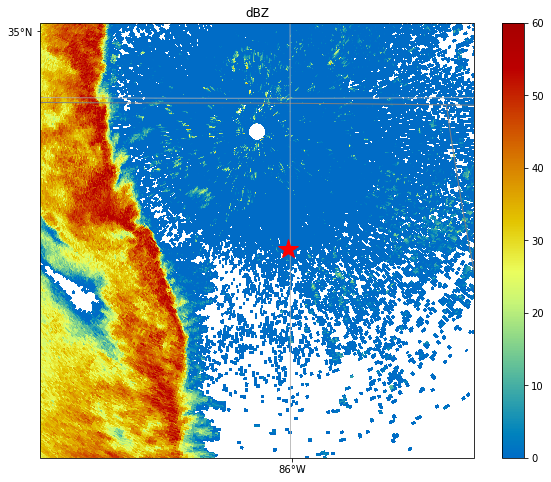

Time:  2017-04-30 20:16:59
Elevation:  0.48339844


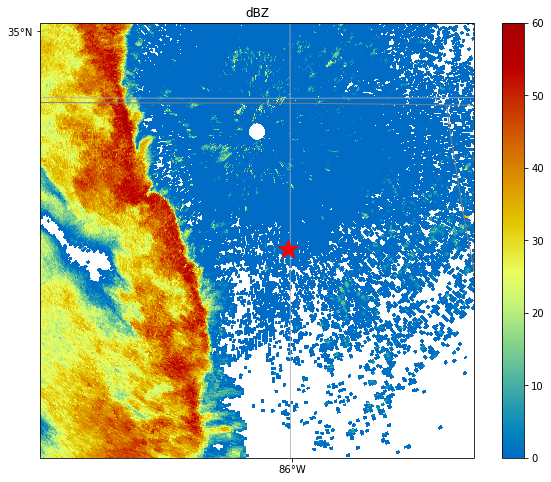

Time:  2017-04-30 20:23:45
Elevation:  0.48339844


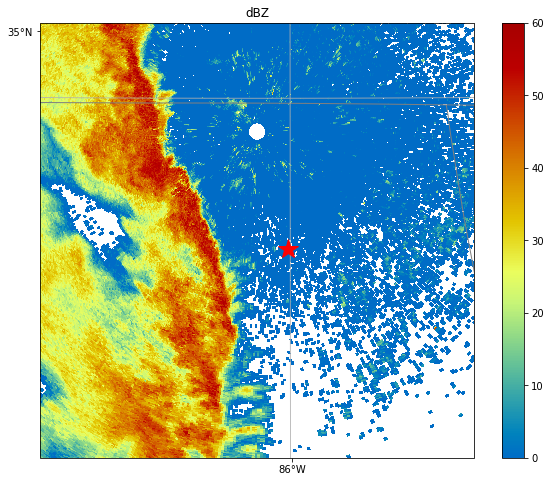

Time:  2017-04-30 20:30:32
Elevation:  0.48339844


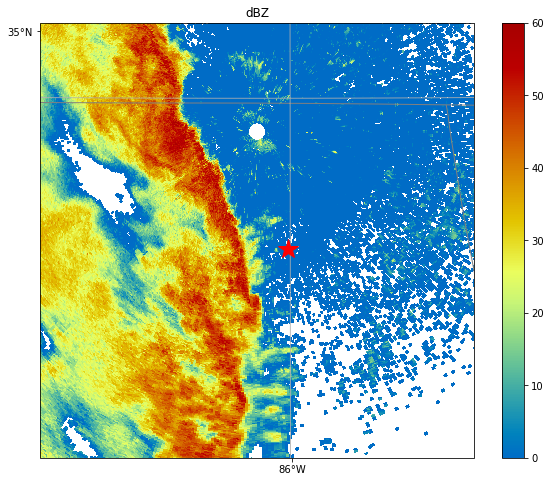

In [27]:
for sweeptime, radar_obj in zip(radar_dict['sweeptimelist'][:5], radar_dict['radarsweeplist'][:5]):
    
    xrad, yrad, zrad = radar_obj.get_gate_x_y_z(0)
    display = pyart.graph.RadarMapDisplay(radar_obj)
    fig = plt.figure(figsize=(10, 8))

    projection = ccrs.LambertConformal(central_latitude=radar_obj.latitude['data'][0],
                                       central_longitude=radar_obj.longitude['data'][0])
    
    # plot dBZ
    ax = fig.add_subplot(111)
    print("Time: ", sweeptime)
    print("Elevation: ", radar_obj.elevation['data'][-1])
    display.plot_ppi_map('REF', 0, title='dBZ', cmap='pyart_HomeyerRainbow',
                         vmin=0., vmax=60, colorbar_label='', ax=ax, resolution='10m', projection=projection,
                         fig=fig)
    
    # plot D0
#     ax = fig.add_subplot(111)
#     print("Time: ", radar_obj.metadata['start_datetime'])
#     print("Elevation: ", radar_obj.elevation['data'][-1])
#     display.plot_ppi_map('D0', 0, title='D0', cmap='viridis',
#                          vmin=0., vmax=4., colorbar_label='', ax=ax, resolution='10m', projection=projection,
#                          fig=fig)
                         # min_lon=-88., max_lon=-86., min_lat=40., max_lat=41.)
    # plot ZDR
    
#     display.plot_ppi_map('ZDR_filtered', 0, title='ZDR', cmap='pyart_HomeyerRainbow',
#                          vmin=0, vmax=6, colorbar_label='', ax=ax, resolution='10m', projection=projection,
#                          fig=fig)
#     display.plot_ppi_map('RHO', 0, title='RHO', cmap='pyart_HomeyerRainbow',
#                          vmin=0, vmax=1, colorbar_label='', ax=ax, resolution='10m', projection=projection,
#                          fig=fig)
    display.plot_range_ring(radar_obj.range['data'][-1]/1000., ax=ax)
    #display.set_limits(xlim=(-50, 50), ylim=(-50, 50), ax=ax)
    #display.set_limits(xlim=(-75, -55), ylim=(75, 95), ax=ax)
    display.plot_point(PIPS_lon, PIPS_lat, 'r*', ms=20)
    display.ax.set_extent([-50000, 50000, -75000, 25000], crs=projection)
    #display.ax.set_extent([40000, 90000, -30000, 20000], crs=projection)
    #ax.plot(PIPS_rad_loc[0]/1000., PIPS_rad_loc[1]/1000., 'r*', ms=20)
    #ax.plot(xrad[theta_index, range_index]/1000., yrad[theta_index, range_index]/1000., 'rx')
    #ax.contourf(xrad / 1000., yrad / 1000., distance)
    #ax.text(PIPS_rad_loc[0] / 1000. - 5., PIPS_rad_loc[1] / 1000., 'PIPS1A', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

In [61]:
radar_obj = radar_dict['radarsweeplist'][4]

# Remap to a regular grid
grid = pyart.map.grid_from_radars(
    (radar_obj,),
    grid_shape=(1, 101, 101),
    grid_limits=((500, 500), (-75000.0, 25000.0), (-50000.0, 50000.0)),
    fields=['REF_filtered', 'ZDR_filtered', 'N0_Z01', 'lamda_Z01', 'mu_Z01'])

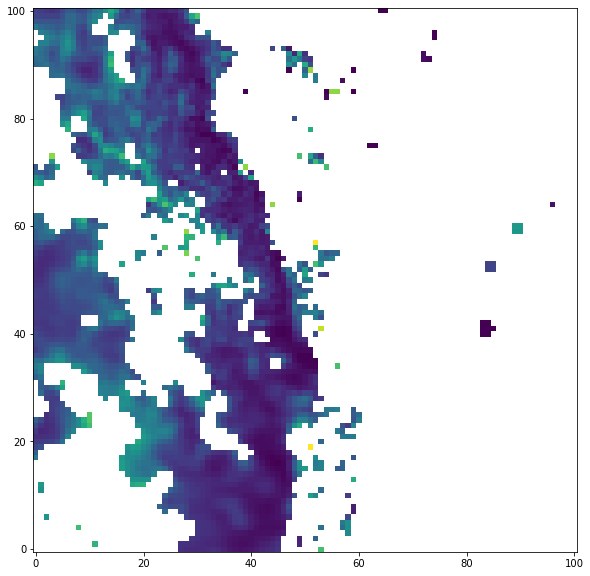

In [62]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(grid.fields['mu_Z01']['data'][0], origin='lower')

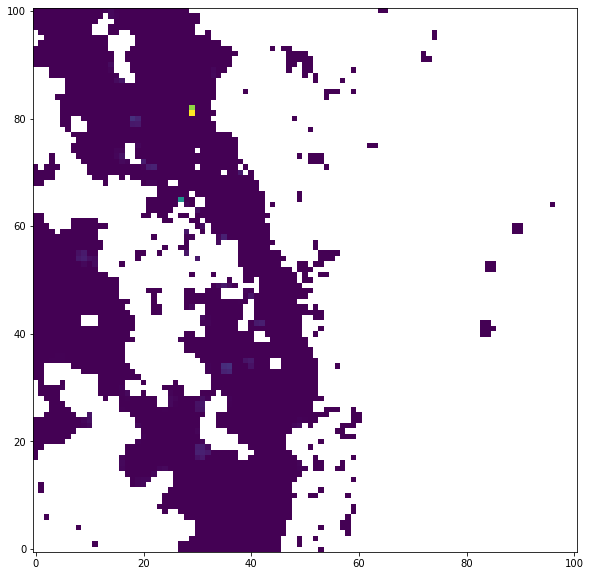

In [63]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(grid.fields['N0_Z01']['data'][0], origin='lower')

In [67]:
print(grid.to_xarray())

<xarray.Dataset>
Dimensions:       (time: 1, x: 101, y: 101, z: 1)
Coordinates:
  * time          (time) object 2017-04-30 20:30:32.104000
  * z             (z) float64 500.0
    lat           (y) float64 34.25 34.26 34.27 34.28 ... 35.14 35.15 35.15
    lon           (x) float64 -86.63 -86.62 -86.61 ... -85.56 -85.55 -85.54
  * y             (y) float64 -7.5e+04 -7.4e+04 -7.3e+04 ... 2.4e+04 2.5e+04
  * x             (x) float64 -5e+04 -4.9e+04 -4.8e+04 ... 4.8e+04 4.9e+04 5e+04
Data variables:
    REF_filtered  (time, z, y, x) float32 20.518261 21.258238 ... nan nan
    ZDR_filtered  (time, z, y, x) float32 0.29019064 0.2865474 ... nan nan
    N0_Z01        (time, z, y, x) float32 nan nan nan nan ... nan nan nan nan
    lamda_Z01     (time, z, y, x) float32 nan nan nan nan ... nan nan nan nan
    mu_Z01        (time, z, y, x) float32 nan nan nan nan ... nan nan nan nan
    ROI           (time, z, y, x) float32 2385.3672 2370.9429 ... 1488.8375


In [69]:
grid_arr = grid.to_xarray()
X, Y = np.meshgrid(grid_arr['x'].values, grid_arr['y'].values)

In [ ]:
# TODO: test by recomputing Z and ZDR from the retrieved DSD and plotting